# Classification

Classification is a supervised learning technique useful when we want to predict discrete variables (like binary outcomes or belonging to a specific class).

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## ISP dataset

In [2]:
df = pd.read_csv('../data/isp_data.csv')

In [3]:
df.head()

,download,upload,label
0,2.373546,5.398106,0
1,3.183643,4.387974,0
2,2.164371,5.341120,0
3,4.595281,3.870637,0
4,3.329508,6.433024,0


In [4]:
df.label.unique()

array([0, 1])

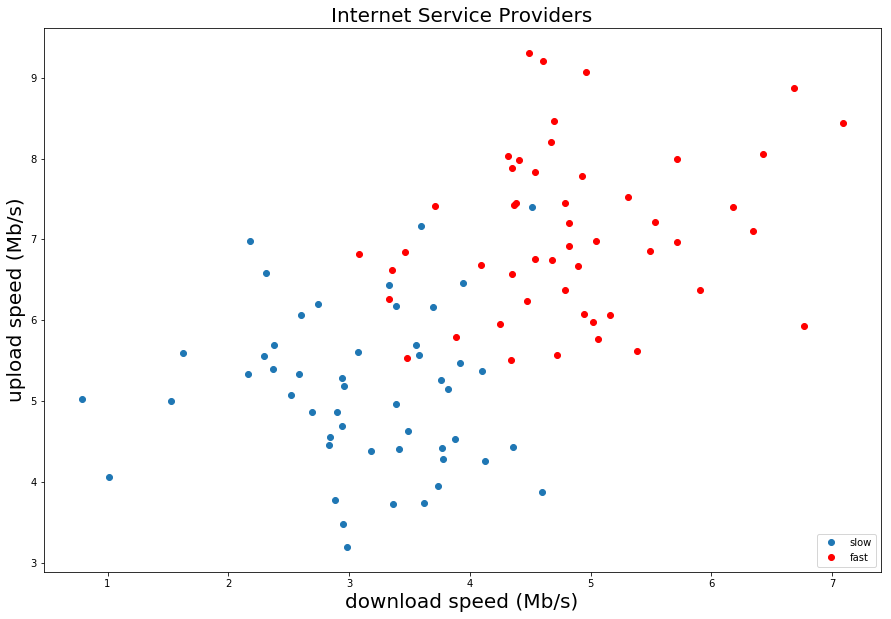

In [5]:
plt.figure(figsize=(15,10))
alpha = df[df['label'] == 0]
beta  = df[df['label'] == 1]
plt.plot(alpha.download, alpha.upload, 'o', label = 'slow')
plt.plot(beta.download, beta.upload, 'or', label = 'fast')
plt.title('Internet Service Providers', size = 20)
plt.xlabel('download speed (Mb/s)', size = 20)
plt.ylabel('upload speed (Mb/s)', size = 20)
plt.legend(loc = 4)

In [6]:
X = df[['download', 'upload']]
y = df['label']

## Nearest Neighbors

In [7]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [8]:
clf = KNeighborsClassifier(3)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state=0)

In [10]:
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

### Performance evaluation

In [11]:
clf.score(X_test, y_test)

0.8484848484848485

In [12]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score, classification_report

In [13]:
y_pred = clf.predict(X_test)

In [14]:
print(confusion_matrix(y_test, y_pred))

[[14  1]
 [ 4 14]]


In [15]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.78      0.93      0.85        15
          1       0.93      0.78      0.85        18

avg / total       0.86      0.85      0.85        33



## Car dataset

In [16]:
df = pd.read_csv('../data/car.csv', dtype='category')

In [17]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
buying      1728 non-null category
maint       1728 non-null category
doors       1728 non-null category
persons     1728 non-null category
lug_boot    1728 non-null category
safety      1728 non-null category
class       1728 non-null category
dtypes: category(7)
memory usage: 12.7 KB


The data mainly categorical. We need to stop here for a second and reflect how to represent this with numbers. We essentially have 2 choices:
- one hot encoding: each column is exploded to multiple binary columns indicating the presence of that particular value. E.g.: buying_vhigh, buying_low, etc..

- number encoding: each value is encoded with a numerical value.

Some columns represent values on a scale (e.g. for safety: low < med < hight), so we could think of a number encoding scheme like:

```
{'low': 1,
 'med': 2,
 'high': 3}
```

However, this scheme would not be ideal, because we don't really know if `med` is worth twice as `low`.

A better encoding scheme is the one hot encoding we use below. Pandas offers a very convenient function for this: `get_dummies`.

In [22]:
X = pd.get_dummies(df[df.columns[:-1]])
X.head()

,buying_high,buying_low,buying_med,buying_vhigh,maint_high,maint_low,maint_med,maint_vhigh,doors_2,doors_3,...,doors_5more,persons_2,persons_4,persons_more,lug_boot_big,lug_boot_med,lug_boot_small,safety_high,safety_low,safety_med
0,0,0,0,1,0,0,0,1,1,0,...,0,1,0,0,0,0,1,0,1,0
1,0,0,0,1,0,0,0,1,1,0,...,0,1,0,0,0,0,1,0,0,1
2,0,0,0,1,0,0,0,1,1,0,...,0,1,0,0,0,0,1,1,0,0
3,0,0,0,1,0,0,0,1,1,0,...,0,1,0,0,0,1,0,0,1,0
4,0,0,0,1,0,0,0,1,1,0,...,0,1,0,0,0,1,0,0,0,1


The outcome variable is also discrete, and we need to encode it. In this case we will use a number encoding scheme.

In [23]:
df['class'].value_counts()

unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64

In [25]:
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder()
y = le.fit_transform(df['class'])
le.classes_

array(['acc', 'good', 'unacc', 'vgood'], dtype=object)

In [26]:
#*** Split into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [27]:
from sklearn.tree import DecisionTreeClassifier

In [32]:
model = DecisionTreeClassifier()   #initialize model
model.fit(X_train, y_train)  #It updates model

#*** Test
y_pred = model.predict(X_test)

array([0, 2, 2, 2, 2, 1, 2, 0, 0, 2, 2, 2, 0, 2, 2, 0, 2, 2, 0, 2, 1, 0,
       0, 2, 2, 2, 2, 2, 2, 2, 1, 0, 2, 0, 1, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       3, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 2, 2, 0, 2, 0, 0, 0, 2, 2, 2, 2, 1,
       2, 2, 2, 0, 2, 2, 2, 3, 2, 0, 0, 2, 2, 2, 0, 2, 3, 0, 2, 0, 2, 2,
       2, 2, 2, 0, 2, 1, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 1, 2, 2, 2,
       0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 0, 2, 0, 0, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       2, 2, 2, 2, 0, 0, 0, 2, 0, 2, 1, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 1,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2,
       2, 0, 2, 3, 2, 2, 2, 1, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 1, 2, 0, 2, 2, 2, 2, 2, 1, 0, 1, 0, 0, 2, 2, 2, 0, 2, 2, 0,
       2, 2, 3, 2, 0, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0,
       2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2,

In [30]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_pred)
acc
print(confusion_matrix(y_test, y_pred))

[[ 73   1   5   0]
 [  0  17   0   0]
 [  2   0 238   0]
 [  1   0   0   9]]


# Exercises

### Exercise 1: 

- Benchmark your prediction. as you may have noticed, the labels are highly imbalanced, with most of the data falling in the `{"unacc": 2}` category. What score would you have gotten if you had predicted 2 for all of your test data? 
- Print a confusion matrix of the test predictions. Which classes get confused?
- Repeat the classification with the KNN model, does it improve the accuracy?

In [39]:
print((y ==2).sum()/len(y))
print(accuracy_score(y, 2 * np.ones(len(y), dtype='int')))
print()
print(pd.Series(y).value_counts()/len(y))

0.7002314814814815
0.7002314814814815

2    0.700231
0    0.222222
1    0.039931
3    0.037616
dtype: float64


### Exercise 2

- load the churn dataset (../data/churn.csv)
- assign the Churn column to a variable called `y`
- assign the other columns to a variable called `features`
- separate numerical columns with `features.select_dtypes`
- split data into train/test with test_size=0.3 and random_state=42
- classify the resulting data using Decision Tree classifier
- try to improve the score changing any of the default initialization parameters of the classifier:
    - max_depth
    - min_samples_split
    - min_samples_leaf
    - max_features
- try to improve the score using a `LogisticRegression`
- try to improve the score using any other of the classifiers used [here](http://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html)


In [56]:
import numpy as np
import pandas as pd
df = pd.read_csv('../data/churn.csv')
y = (df['Churn'] == 'Yes')
features = df.drop('Churn', axis='columns')
X = features.select_dtypes(include='number')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = DecisionTreeClassifier(max_depth = 3, min_samples_split = 4, min_samples_leaf = 2, max_features = 1)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.7482252721249408

In [58]:
from sklearn.linear_model import LogisticRegression
model_1 = LogisticRegression()
model_1.fit(X_train, y_train)
model_1.score(X_test, y_test)

0.7941315664931378

*Copyright &copy; 2017 Francesco Mosconi & CATALIT LLC. All rights reserved.*